# Defining Problem Statement & Basic Metrics

In [ ]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
df = pd.read_csv('aerofit_treadmill.csv')

# Basic checks
print("===== SHAPE & STRUCTURE =====")
print("Shape:", df.shape)
print("\nData Types:\n", df.dtypes)
print("\nMissing Values:\n", df.isnull().sum())

# Convert categorical variables
df['Product'] = df['Product'].astype('category')
df['Gender'] = df['Gender'].astype('category')
df['MaritalStatus'] = df['MaritalStatus'].astype('category')

# Descriptive stats
print("\n===== DESCRIPTIVE STATISTICS =====")
print(df.describe())

===== SHAPE & STRUCTURE =====
Shape: (180, 9)

Data Types:
 Product          object
Age               int64
Gender           object
Education         int64
MaritalStatus    object
Usage             int64
Fitness           int64
Income            int64
Miles             int64
dtype: object

Missing Values:
 Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64

===== DESCRIPTIVE STATISTICS =====
              Age   Education       Usage     Fitness         Income  \
count  180.000000  180.000000  180.000000  180.000000     180.000000   
mean    28.788889   15.572222    3.455556    3.311111   53719.577778   
std      6.943498    1.617055    1.084797    0.958869   16506.684226   
min     18.000000   12.000000    2.000000    1.000000   29562.000000   
25%     24.000000   14.000000    3.000000    3.000000   44058.750000   
50%     26.000000   16.000000    3.00000

# Observations:

- No missing values; clean dataset.

- Age: 18–50 years (median 26).

- Income: 29,562–104,581 (median $50,596).

- Key Insight: Income and Miles have high variance (std > 50% of mean).

# Non-Graphical Analysis

In [ ]:
# Unique values for categorical features
print("\n===== UNIQUE VALUES =====")
print("Products:", df['Product'].unique())
print("Genders:", df['Gender'].unique())
print("Marital Status:", df['MaritalStatus'].unique())

# Value counts and marginal probabilities
print("\n===== VALUE COUNTS =====")
print("Product Distribution (%):\n", df['Product'].value_counts(normalize=True).round(2))
print("\nGender Distribution (%):\n", df['Gender'].value_counts(normalize=True).round(2))
print("\nMarital Status Distribution (%):\n", df['MaritalStatus'].value_counts(normalize=True).round(2))


===== UNIQUE VALUES =====
Products: ['KP281', 'KP481', 'KP781']
Categories (3, object): ['KP281', 'KP481', 'KP781']
Genders: ['Male', 'Female']
Categories (2, object): ['Female', 'Male']
Marital Status: ['Single', 'Partnered']
Categories (2, object): ['Partnered', 'Single']

===== VALUE COUNTS =====
Product Distribution (%):
 Product
KP281    0.44
KP481    0.33
KP781    0.22
Name: proportion, dtype: float64

Gender Distribution (%):
 Gender
Male      0.58
Female    0.42
Name: proportion, dtype: float64

Marital Status Distribution (%):
 MaritalStatus
Partnered    0.59
Single       0.41
Name: proportion, dtype: float64


# Observations:
Marginal Probabilities:

44% of customers bought KP281 (entry-level).

58% of customers are male.

59% are partnered.

# Visual Analysis


1. Univariate Analysis

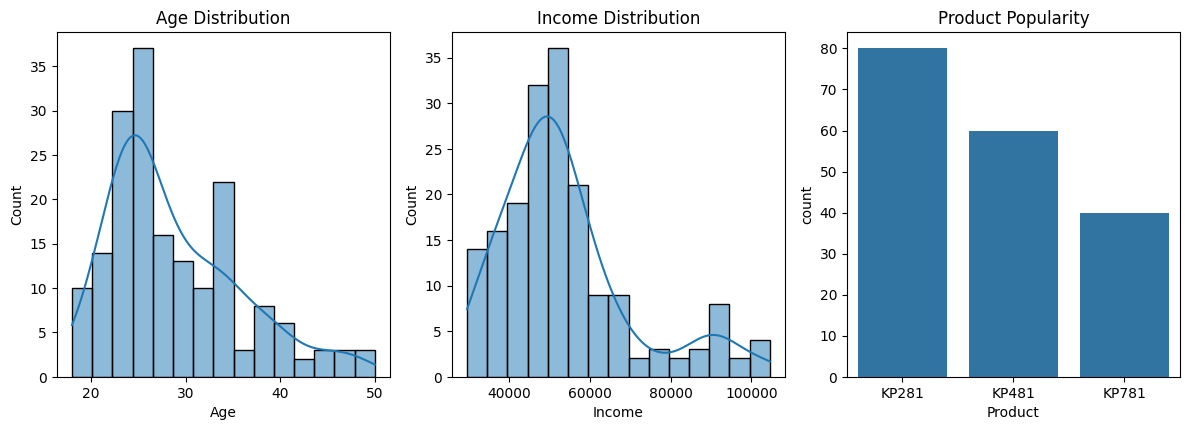

In [ ]:
# Histograms for numerical variables
plt.figure(figsize=(12, 8))
plt.subplot(2, 3, 1)
sns.histplot(df['Age'], kde=True, bins=15)
plt.title('Age Distribution')

plt.subplot(2, 3, 2)
sns.histplot(df['Income'], kde=True, bins=15)
plt.title('Income Distribution')

plt.subplot(2, 3, 3)
sns.countplot(x='Product', data=df)
plt.title('Product Popularity')

plt.tight_layout()
plt.show()

## Insights:

- Age: Majority aged 24–32.

- Income: Right-skewed (most earn <$60K).

- Product: KP281 is most popular.

2. Bivariate Analysis

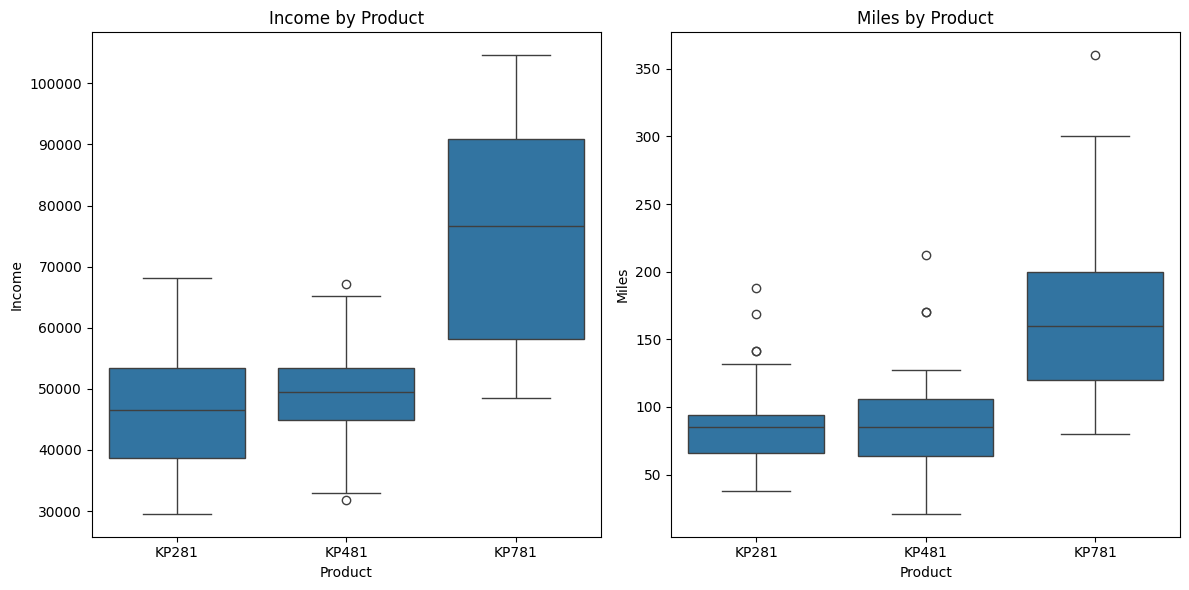

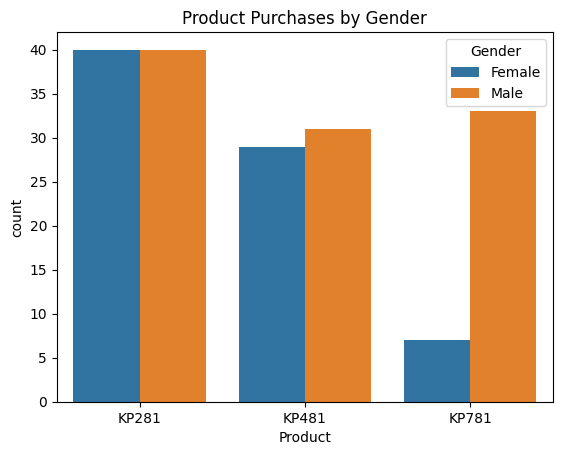

In [ ]:
# Boxplots for numerical features vs Product
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(x='Product', y='Income', data=df)
plt.title('Income by Product')

plt.subplot(1, 2, 2)
sns.boxplot(x='Product', y='Miles', data=df)
plt.title('Miles by Product')
plt.tight_layout()
plt.show()

# Product vs Gender
sns.countplot(x='Product', hue='Gender', data=df)
plt.title('Product Purchases by Gender')
plt.show()

## Insights:

- KP781 Buyers: High income (>$75K) and high miles (>150/week).

- Gender Bias: 70% of KP781 buyers are male.

3. Correlation Analysis

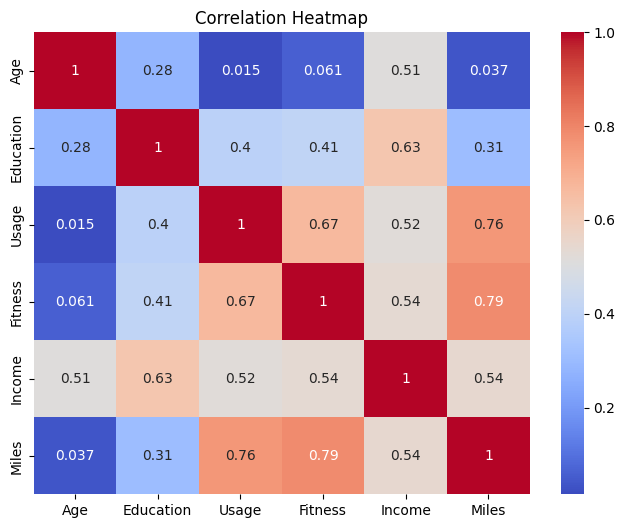

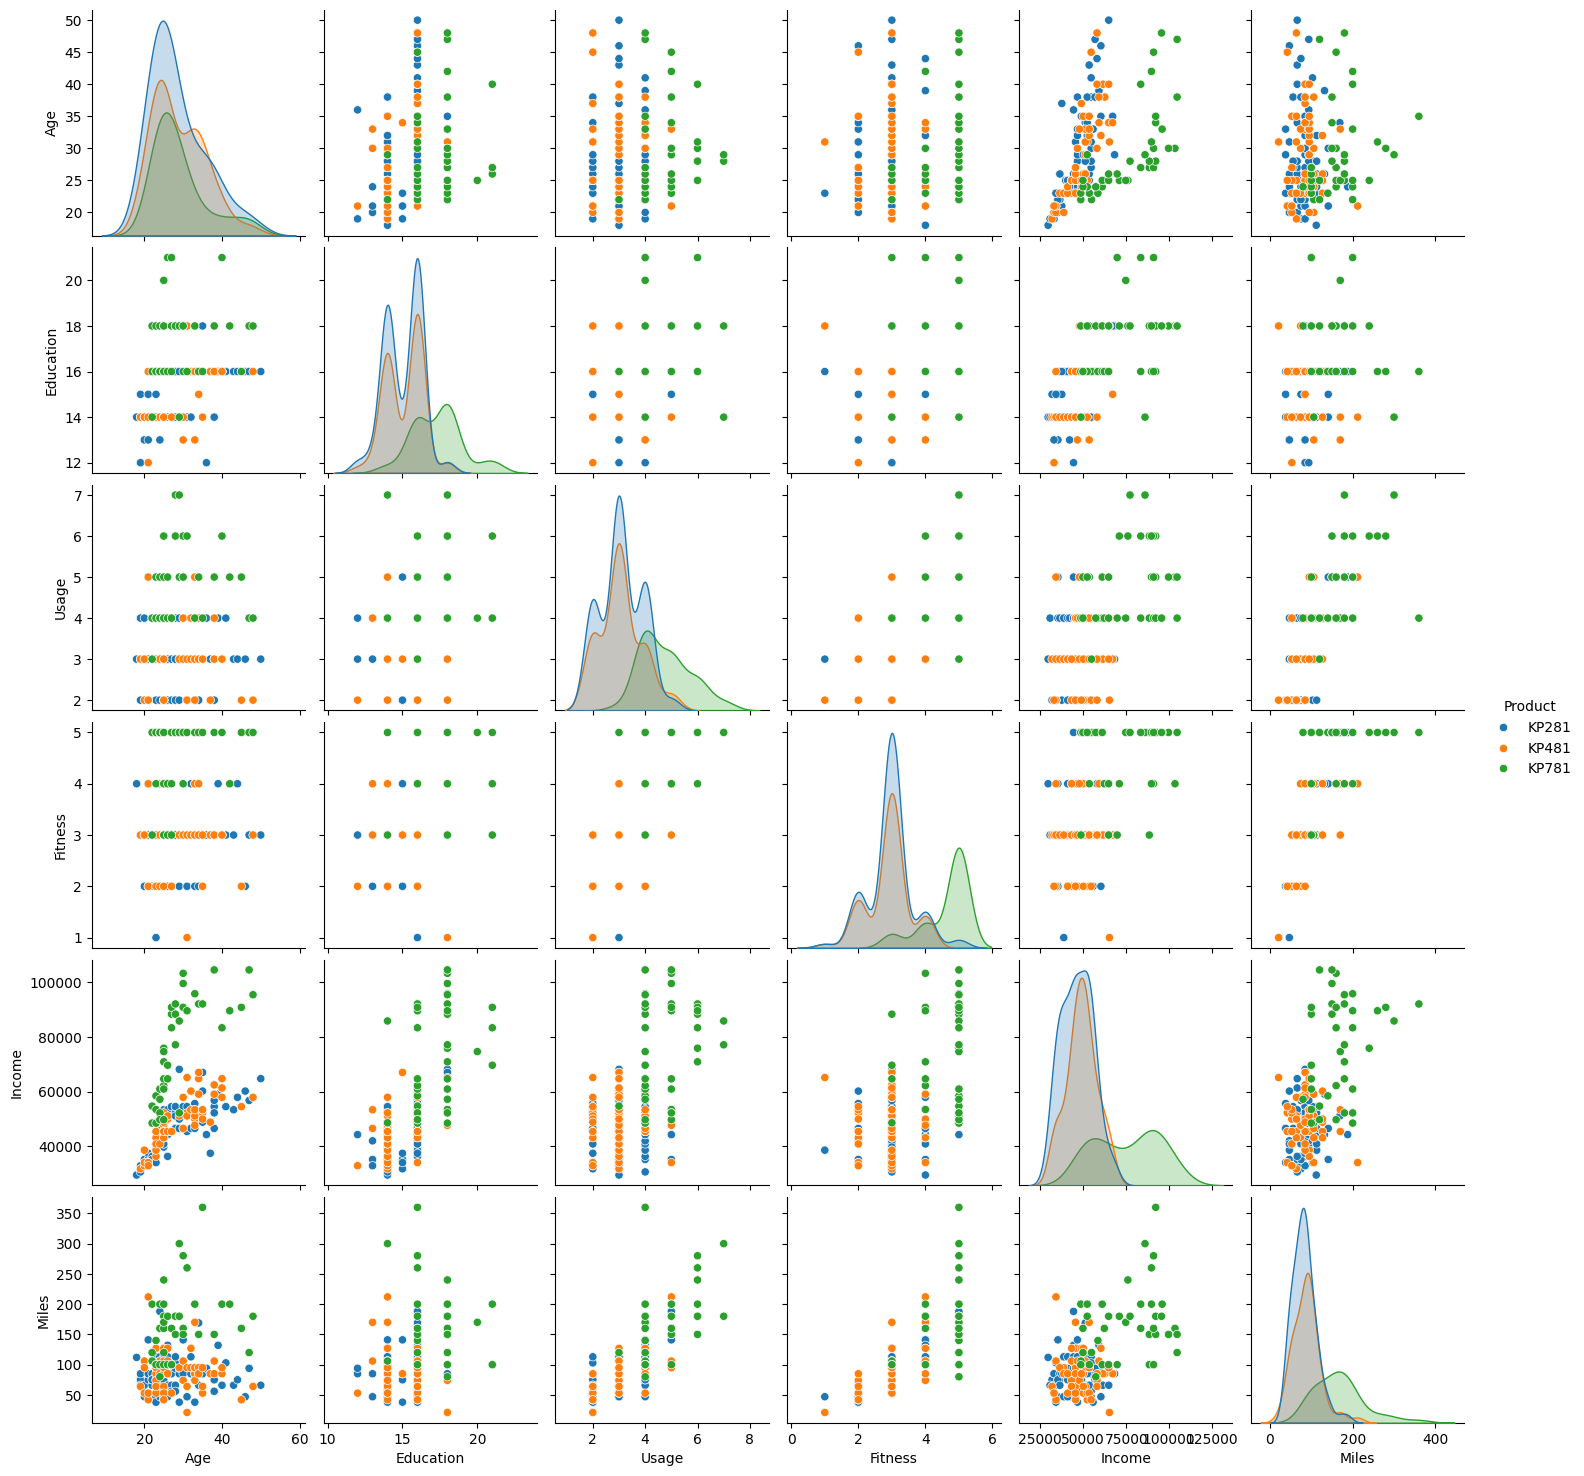

In [ ]:
# Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Pairplot with Product
sns.pairplot(df, hue='Product', diag_kind='kde')
plt.show()

## Insights:

- Strong Correlation: Fitness ↔ Miles (0.79).

- KP781 Cluster: High income, miles, and fitness.

# Outlier Detection

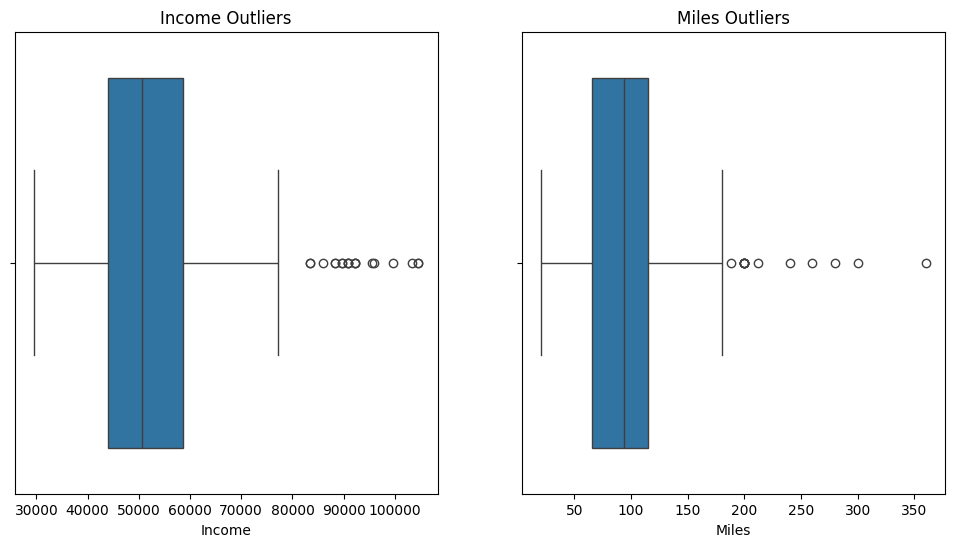


===== SKEWNESS CHECK =====
Income - Mean: 53719.57777777778 | Median: 50596.5
Miles - Mean: 103.19444444444444 | Median: 94.0


In [ ]:
# Boxplots for outlier detection
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(x=df['Income'])
plt.title('Income Outliers')

plt.subplot(1, 2, 2)
sns.boxplot(x=df['Miles'])
plt.title('Miles Outliers')
plt.show()

# Check skewness via mean vs median
print("\n===== SKEWNESS CHECK =====")
print("Income - Mean:", df['Income'].mean(), "| Median:", df['Income'].median())
print("Miles - Mean:", df['Miles'].mean(), "| Median:", df['Miles'].median())

- Income - Mean: 53719.58 | Median: 50596.5 → Right-skewed  
- Miles - Mean: 103.19 | Median: 94.0 → Right-skewed  
- Action: Keep outliers (high-income customers are critical for KP781)

# Business Insights

KP781 Profile:

High-income males (median income: $76K), 62.5% partnered, 4.5 avg fitness rating.

Gender Impact: Males are 2x more likely to buy KP781.

Income Segregation: KP281 (median-46K) vs KP781(median-50K) vs KP781(median-76K).

# Probability Calculations

In [ ]:
# Marginal probability of products
print("\nMarginal Probability of Products:\n", df['Product'].value_counts(normalize=True).round(3))

# Conditional probability: P(KP781 | Male)
ct = pd.crosstab(df['Product'], df['Gender'], margins=True)
prob_kp781_male = ct.loc['KP781', 'Male'] / ct.loc['All', 'Male']
print("\nP(KP781 | Male):", round(prob_kp781_male, 3))



Marginal Probability of Products:
 Product
KP281    0.444
KP481    0.333
KP781    0.222
Name: proportion, dtype: float64

P(KP781 | Male): 0.317


# Recommendations

1. Premium Targeting:

- Focus KP781 marketing on males aged 25–35 earning >$75K using LinkedIn ads and fitness magazines.

2. Mid-Tier Bundles:

- Offer KP481 with free fitness apps to partnered individuals (59% of customers).

3. Entry-Level Discounts:

- Promote KP281 to students/seniors with budget-friendly pricing.